In [996]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from functools import reduce
import seaborn as sns

In [997]:
przestepstwa = pd.read_csv("Przestepstwa_pow.csv")
pow = pd.read_csv("Przestepstwa_pow.csv")
bezrobotni = pd.read_csv("Bezrobotni.csv")
ceny = pd.read_csv("Ceny_mieszkan.csv")
dochody = pd.read_csv("Dochody_na_mieszkanca.csv")
wynagrodzenie = pd.read_csv("Przecietne_wynagrodzenie.csv")
rozwody = pd.read_csv("Rozwody_i_separacje.csv")
ludnosc = pd.read_csv("Ludnosc.csv")
pow_map = "powiaty.shp"
pow_m = gpd.read_file(pow_map)

In [998]:
list = [przestepstwa, bezrobotni, ceny, dochody, wynagrodzenie, rozwody]

for i in list:
    i.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)

In [999]:
przestepstwa.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem' : 'Przestepstwa'
}, inplace=True)
bezrobotni.rename(columns={
    'Bezrobotni zarejestrowani pozostający bez pracy dłużej niż 1 rok|ogółem' : 'Bezrobotni'
}, inplace=True)
ceny.rename(columns={
    'Średnia cena lokali mieszkalnych sprzedanych w ramach transakcji rynkowych|ogółem|ogółem' : 'Ceny mieszkan'
}, inplace=True)
dochody.rename(columns={
    'Dochody na 1 mieszkańca|gminy łącznie z miastami na prawach powiatu|ogółem' : 'Dochody na mieszkanca'
}, inplace=True)
wynagrodzenie.rename(columns={
    'Przeciętne miesięczne wynagrodzenia brutto|ogółem' : 'Wynagrodzenie'
}, inplace=True)
rozwody.rename(columns={
    'Rozwody i separacje|rozwody|ogółem' : 'Rozwody i separacje'
}, inplace=True)

In [1000]:
ludnosc.columns = ludnosc.columns.str.strip()

ludnosc = pd.DataFrame({
    'powiat': ludnosc['Powiaty'],
    'Ludnosc_powiaty': ludnosc['Ludnosc']
})

print(ludnosc)

                powiat  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [1001]:
przestepstwa.head()

,powiat,Województwo,Przestepstwa
0,nowosądecki,małopolskie,11958.0
1,tarnowski,małopolskie,2860.0
2,gorzowski,lubuskie,1108.0
3,koniński,wielkopolskie,1163.0
4,poznański,wielkopolskie,5260.0


In [1002]:
przestepstwa['powiat'] = przestepstwa['powiat'].str.strip()
ludnosc['powiat'] = ludnosc['powiat'].str.strip()

In [1003]:
przestepstwa_merge = przestepstwa.merge(ludnosc, on='powiat')

In [1004]:
przestepstwa_merge['Przestepstwa_średnia_powiaty'] = (przestepstwa_merge['Przestepstwa']/przestepstwa_merge['Ludnosc_powiaty'])

In [1005]:
print(przestepstwa_merge[['powiat', 'Przestepstwa_średnia_powiaty']])

           powiat  Przestepstwa_średnia_powiaty
0     nowosądecki                      0.055158
1       tarnowski                      0.014194
2       gorzowski                      0.015424
3        koniński                      0.008943
4       poznański                      0.013174
..            ...                           ...
395     siedlecki                      0.009415
396    sokołowski                      0.017081
397     węgrowski                      0.012260
398  sochaczewski                      0.016685
399   żyrardowski                      0.021162

[400 rows x 2 columns]


In [1006]:
bezrobotni.head()

,powiat,Województwo,Bezrobotni
0,nowosądecki,małopolskie,3256.0
1,tarnowski,małopolskie,2009.0
2,gorzowski,lubuskie,402.0
3,koniński,wielkopolskie,1928.0
4,poznański,wielkopolskie,913.0


In [1007]:
bezrobotni['powiat'] = bezrobotni['powiat'].str.strip()
ludnosc['powiat'] = ludnosc['powiat'].str.strip()

In [1008]:
bezrobotni_merge = bezrobotni.merge(ludnosc, on='powiat')

In [1009]:
bezrobotni_merge['Bezrobotni_średnia_powiaty'] = (bezrobotni_merge['Bezrobotni']/bezrobotni_merge['Ludnosc_powiaty'])

In [1010]:
print(bezrobotni_merge[['powiat', 'Bezrobotni_średnia_powiaty']])

           powiat  Bezrobotni_średnia_powiaty
0     nowosądecki                    0.015019
1       tarnowski                    0.009970
2       gorzowski                    0.005596
3        koniński                    0.014825
4       poznański                    0.002287
..            ...                         ...
395     siedlecki                    0.007190
396    sokołowski                    0.010613
397     węgrowski                    0.011987
398  sochaczewski                    0.006173
399   żyrardowski                    0.020462

[400 rows x 2 columns]


In [1011]:
rozwody.head()

,powiat,Województwo,Rozwody i separacje
0,nowosądecki,małopolskie,139.0
1,tarnowski,małopolskie,175.0
2,gorzowski,lubuskie,72.0
3,koniński,wielkopolskie,142.0
4,poznański,wielkopolskie,427.0


In [1012]:
rozwody['powiat'] = rozwody['powiat'].str.strip()

In [1013]:
rozwody_merge = rozwody.merge(ludnosc, on='powiat')

In [1014]:
rozwody_merge['Rozwody_średnia_powiaty'] = (rozwody_merge['Rozwody i separacje']/rozwody_merge['Ludnosc_powiaty'])

In [1015]:
print(rozwody_merge[['powiat', 'Rozwody_średnia_powiaty']])

           powiat  Rozwody_średnia_powiaty
0     nowosądecki                 0.000641
1       tarnowski                 0.000868
2       gorzowski                 0.001002
3        koniński                 0.001092
4       poznański                 0.001069
..            ...                      ...
395     siedlecki                 0.001020
396    sokołowski                 0.000911
397     węgrowski                 0.000912
398  sochaczewski                 0.001329
399   żyrardowski                 0.001294

[400 rows x 2 columns]


In [1016]:
files_to_merge = [przestepstwa_merge, bezrobotni_merge, ceny, dochody, wynagrodzenie, rozwody_merge]

stats =['powiat', 'Województwo']

merged = reduce(lambda left, right: left.merge(right, on=stats, how='inner'), files_to_merge)
merged.drop(['Przestepstwa', 'Ludnosc_powiaty_x', 'Bezrobotni', 'Ludnosc_powiaty_y', 'Rozwody i separacje', 'Ludnosc_powiaty'], axis=1, inplace=True)

merged.to_csv("merged_output.csv", index=False)

print(merged)

           powiat    Województwo  Przestepstwa_średnia_powiaty  \
0     nowosądecki    małopolskie                      0.055158   
1       tarnowski    małopolskie                      0.014194   
2       gorzowski       lubuskie                      0.015424   
3        koniński  wielkopolskie                      0.008943   
4       poznański  wielkopolskie                      0.013174   
..            ...            ...                           ...   
515     siedlecki    mazowieckie                      0.009415   
516    sokołowski    mazowieckie                      0.017081   
517     węgrowski    mazowieckie                      0.012260   
518  sochaczewski    mazowieckie                      0.016685   
519   żyrardowski    mazowieckie                      0.021162   

     Bezrobotni_średnia_powiaty  Ceny mieszkan  Dochody na mieszkanca  \
0                      0.015019       242497.0                6290.69   
1                      0.009970       210957.0               

In [1017]:
merged.columns

Index(['powiat', 'Województwo', 'Przestepstwa_średnia_powiaty',
       'Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
       'Wynagrodzenie', 'Rozwody_średnia_powiaty'],
      dtype='object')

In [1018]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()

columns_to_standardize = [
    'Bezrobotni_średnia_powiaty', 
    'Ceny mieszkan', 
    'Dochody na mieszkanca', 
    'Wynagrodzenie', 
    'Rozwody_średnia_powiaty', 
    'Przestepstwa_średnia_powiaty'
]

data = merged[columns_to_standardize]

scaler = StandardScaler()

standardized_data = scaler.fit_transform(data)

standardized_data_df = pd.DataFrame(
    standardized_data, 
    columns=columns_to_standardize,
    index=merged.index
)

# Drop original columns and add standardized ones
merged = merged.drop(columns=columns_to_standardize)
merged = pd.concat([merged, standardized_data_df], axis=1)

merged.to_csv('merged_standardized.csv', index=False)

In [1019]:
columns_to_logaritmize = [
    'Bezrobotni_średnia_powiaty', 
    'Ceny mieszkan', 
    'Dochody na mieszkanca', 
    'Wynagrodzenie', 
    'Rozwody_średnia_powiaty'
]

merged_log = np.log(merged[columns_to_logaritmize])
merged_rest = merged.drop(columns=columns_to_logaritmize)
merged = pd.concat([merged_rest, merged_log], axis=1)

c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [1020]:
merged.head()

,powiat,Województwo,Przestepstwa_średnia_powiaty,Bezrobotni_średnia_powiaty,Ceny mieszkan,Dochody na mieszkanca,Wynagrodzenie,Rozwody_średnia_powiaty
0,nowosądecki,małopolskie,2.724871,-1.006781,-0.662720,-1.261771,NaN,NaN
1,tarnowski,małopolskie,-0.389768,NaN,-2.521025,NaN,NaN,NaN
2,gorzowski,lubuskie,-0.296227,NaN,NaN,NaN,-0.926945,NaN
3,koniński,wielkopolskie,-0.789038,-1.081359,NaN,NaN,NaN,NaN
4,poznański,wielkopolskie,-0.467305,NaN,0.583345,-1.033830,NaN,NaN


In [1021]:
print(merged.isnull().sum())

powiat                            0
Województwo                       0
Przestepstwa_średnia_powiaty      0
Bezrobotni_średnia_powiaty      310
Ceny mieszkan                   321
Dochody na mieszkanca           358
Wynagrodzenie                   321
Rozwody_średnia_powiaty         291
dtype: int64


In [1022]:
merged.fillna(merged.mean(), inplace=True)

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_6992\388850915.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.fillna(merged.mean(), inplace=True)


In [1023]:
print(merged.isnull().sum())

powiat                          0
Województwo                     0
Przestepstwa_średnia_powiaty    0
Bezrobotni_średnia_powiaty      0
Ceny mieszkan                   0
Dochody na mieszkanca           0
Wynagrodzenie                   0
Rozwody_średnia_powiaty         0
dtype: int64


In [1024]:
merged

,powiat,Województwo,Przestepstwa_średnia_powiaty,Bezrobotni_średnia_powiaty,Ceny mieszkan,Dochody na mieszkanca,Wynagrodzenie,Rozwody_średnia_powiaty
0,nowosądecki,małopolskie,2.724871,-1.006781,-0.662720,-1.261771,-0.722054,-1.011636
1,tarnowski,małopolskie,-0.389768,-0.577635,-2.521025,-0.764277,-0.722054,-1.011636
2,gorzowski,lubuskie,-0.296227,-0.577635,-0.765357,-0.764277,-0.926945,-1.011636
3,koniński,wielkopolskie,-0.789038,-1.081359,-0.765357,-0.764277,-0.722054,-1.011636
4,poznański,wielkopolskie,-0.467305,-0.577635,0.583345,-1.033830,-0.722054,-1.011636
...,...,...,...,...,...,...,...,...
515,siedlecki,mazowieckie,-0.753135,-0.577635,0.770892,-0.764277,-0.722054,-1.011636
516,sokołowski,mazowieckie,-0.170278,-0.577635,-0.765357,-0.764277,-5.158247,-1.011636
517,węgrowski,mazowieckie,-0.536772,-0.577635,-0.765357,-0.764277,-0.722054,-1.011636
518,sochaczewski,mazowieckie,-0.200329,-0.577635,-0.765357,-0.764277,0.524146,-2.441546


In [1025]:
X = merged[['Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
       'Wynagrodzenie', 'Rozwody_średnia_powiaty']]
X = sm.add_constant(X)
y = merged['Przestepstwa_średnia_powiaty']

#merged.fillna(merged.mean(), inplace=True)

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Przestepstwa_średnia_powiaty   R-squared:                       0.026
Model:                                      OLS   Adj. R-squared:                  0.017
Method:                           Least Squares   F-statistic:                     2.747
Date:                          Mon, 09 Dec 2024   Prob (F-statistic):             0.0184
Time:                                  21:06:52   Log-Likelihood:                -730.99
No. Observations:                           520   AIC:                             1474.
Df Residuals:                               514   BIC:                             1500.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

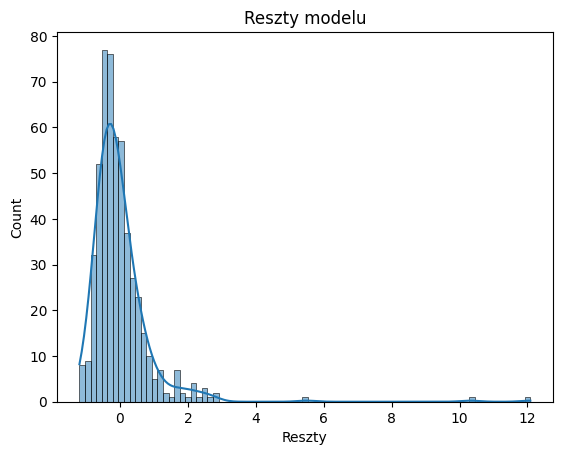

In [1026]:
residuals = model.resid

sns.histplot(residuals, kde=True)
plt.title("Reszty modelu")
plt.xlabel("Reszty")
plt.show()


In [1027]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


R2: 0.05528734744622066
MSE: 0.44924964225809927
                      Feature  Coefficient
0                       const     0.000000
1  Bezrobotni_średnia_powiaty    -0.103371
2               Ceny mieszkan     0.001272
3       Dochody na mieszkanca     0.131941
4               Wynagrodzenie     0.029042
5     Rozwody_średnia_powiaty     0.082976
